# K-NEAREST NEIGHBOURS (KNN)

<ul>1. KNN melakukan prediksi berdasarkan kedekatan karakteristik dengan tetangga terdekat</ul>
<ul>2. Prediksi dapat dilakukan pada klasifikasi maupun regresi</ul>

In [1]:
import pandas as pd

sensus = {
    'jk'    :['pria','pria','pria','pria','wanita','wanita',
              'wanita','wanita','wanita'],
    'tinggi':[158, 170, 183, 191, 155, 163, 180, 158, 170],
    'berat' :[64, 86, 84, 80, 49, 59, 67, 54, 67]
         }

sensus_df = pd.DataFrame(sensus)
sensus_df

,jk,tinggi,berat
0,pria,158,64
1,pria,170,86
2,pria,183,84
3,pria,191,80
4,wanita,155,49
5,wanita,163,59
6,wanita,180,67
7,wanita,158,54
8,wanita,170,67


# FEATURES & TARGET

In [2]:
import numpy as np

X_train = np.array(sensus_df[['tinggi','jk']])
y_train = np.array(sensus_df['berat'])

print(f'X_train = \n{X_train}')
print(f'y_train = {y_train}')

X_train = 
[[158 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [155 'wanita']
 [163 'wanita']
 [180 'wanita']
 [158 'wanita']
 [170 'wanita']]
y_train = [64 86 84 80 49 59 67 54 67]


In [3]:
X_train_transpose = np.transpose(X_train)

print(f'X_train_transposed = \n{X_train_transpose}')

X_train_transposed = 
[[158 170 183 191 155 163 180 158 170]
 ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita'
  'wanita']]


In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

jk_binarised = lb.fit_transform(X_train_transpose[1])

print(f'jk_binarised = {jk_binarised}')

jk_binarised = [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [5]:
jk_binarised = jk_binarised.flatten()
jk_binarised

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [6]:
X_train_transpose[1] = jk_binarised
X_train = X_train_transpose.transpose()

print(f'X_train = \n{X_train}')

X_train = 
[[158 0]
 [170 0]
 [183 0]
 [191 0]
 [155 1]
 [163 1]
 [180 1]
 [158 1]
 [170 1]]


# TRAINING KNN REGRESSION MODEL

In [7]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

# Prediksi Berat Badan

In [8]:
X_new = np.array([[155, 1]])
X_new

array([[155,   1]])

In [9]:
y_new = model.predict(X_new)

print(f'y_new = {y_new}')

y_new = [55.66666667]


# EVALUASI KNN REGRESSION MODEL

In [10]:
X_test = np.array([[168, 0], [180, 0], [160, 1], [169, 1]])
y_test = np.array([65, 96, 52, 67])

In [11]:
y_pred = model.predict(X_test)
y_pred

array([70.66666667, 79.        , 59.        , 70.66666667])

# EVALUASI R-SQUARE

In [12]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, y_pred)

print(f'R2_Square = {r2_score}')

R2_Square = 0.6290565226735438


# METRIC EVALUASI 6 : MAE (MEAN ABSOLUTE ERROR) ATAU MAD (MEAN ABSOLUTE DEVIATION)

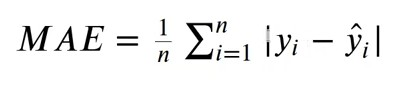

In [13]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print(f'MAE = {mae}')

MAE = 8.333333333333336


# METRIC EVALUASI 7 : MSE (MEAN SQUARED ERROR) ATAU MSD (MEAN SQUARED DEVIATION)

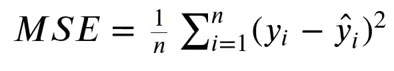

In [14]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(f'MSE = {mse}')

MSE = 95.8888888888889


# PERMASALAHAN SCALING PADA FEATURES

In [15]:
from scipy.spatial.distance import euclidean

# tinggi dalam milimeter
X_train = np.array([[1700, 0], [1600, 1]])
X_new = np.array([[1640, 0]])

[euclidean(X_new[0], d) for d in X_train]

[60.0, 40.01249804748511]

In [16]:
# tinggi dalam meter
X_train = np.array([[1.7, 0], [1.6, 1]])
X_new = np.array([[1.64, 0]])

[euclidean(X_new[0], d) for d in X_train]

[0.06000000000000005, 1.0007996802557444]

# STANDAR SCALER (STANDARD SCORE ATAU Z-SCORE)

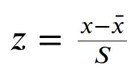

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [18]:
# tinggi dalam milimeter
X_train = np.array([[1700, 0], [1600, 1]])
X_train_scaled = ss.fit_transform(X_train)
print(f'X_train_scaled = \n{X_train_scaled}')

X_new = np.array([[1640, 0]])
X_new_scaled = ss.transform(X_new)
print(f'X_new_scaled = \n{X_new_scaled}')

[euclidean(X_new_scaled[0], d) for d in X_train_scaled]

X_train_scaled = 
[[ 1. -1.]
 [-1.  1.]]
X_new_scaled = 
[[-0.2 -1. ]]


[1.2, 2.154065922853802]

In [19]:
# tinggi dalam meter
X_train = np.array([[1.7, 0], [1.6, 1]])
X_train_scaled = ss.fit_transform(X_train)
print(f'X_train_scaled = \n{X_train_scaled}')

X_new = np.array([[1.64, 0]])
X_new_scaled = ss.transform(X_new)
print(f'X_new_scaled = \n{X_new_scaled}')

[euclidean(X_new_scaled[0], d) for d in X_train_scaled]

X_train_scaled = 
[[ 1. -1.]
 [-1.  1.]]
X_new_scaled = 
[[-0.2 -1. ]]


[1.2000000000000026, 2.1540659228538006]

# FEATURES SCALING PADA KNN

## DATASET

In [20]:
# Training Set
X_train = np.array([[158, 0], [170, 0], [183, 0], [191, 0], [155, 1], [163, 1], [180, 1], 
                    [158, 1], [170, 1]])
y_train = np.array([64, 86, 84, 80, 49, 59, 67, 54, 67])

# Test Set
X_test = np.array([[168, 0], [180, 0], [160, 1], [169, 1]])
y_test = np.array([65, 96, 52, 67])

## FEATURES SCALING (STANDARD SCALER)

In [21]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

print(f'X_train_scaled = \n{X_train_scaled}')
print(f'X_test_scaled = \n{X_test_scaled}')

X_train_scaled = 
[[-0.9908706  -1.11803399]
 [ 0.01869567 -1.11803399]
 [ 1.11239246 -1.11803399]
 [ 1.78543664 -1.11803399]
 [-1.24326216  0.89442719]
 [-0.57021798  0.89442719]
 [ 0.86000089  0.89442719]
 [-0.9908706   0.89442719]
 [ 0.01869567  0.89442719]]
X_test_scaled = 
[[-0.14956537 -1.11803399]
 [ 0.86000089 -1.11803399]
 [-0.82260955  0.89442719]
 [-0.06543485  0.89442719]]


## TRAINING & EVALUASI MODEL

In [22]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MAE = {mae}')
print(f'MSE = {mse}')

MAE = 7.583333333333336
MSE = 85.13888888888893
